# La libreta científica de Quim
Uff ... ahora que sé que alguien más va a leer esta libreta, tendré que intentar escribirla de forma que se entienda. La parte buena es que así cuando me la mire yo en un par de semanas quizás entienda algo.

Veamos si la materia oscura que hay en Perseus nos genera rayos gamma.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

Ya tenemos las librerías que necesitamos, ahora a leer los datos. ¿Os acordáis de cómo hacerlo? Si no, preguntad a Alba que cuando quiere ¡se explica muy bien!

In [3]:
#Leemos los ficheros y les damos un nombre
perseus_ON= pd.read_csv('data/EvtList_ON_Perseus_Other.txt', sep=' ')
perseus_OFF= pd.read_csv('data/EvtList_OFF_Perseus_Other.txt', sep=' ')
#A ver cuantos datos estoy cargando?
len(perseus_ON)

4111265

4 millones y medio de filas!! Eso ningún Excel lo puede abrir. Por suerte Python sí.  
Y por qué cada vez cargamos más datos? Porque cada vez lo complicamos un poco.  

Alba os explicó como hacer el corte en hadronness. Pero ella ya tenía los datos un poco preparados. Se había quedado con sólo los que tienen un ** Theta Cuadrado ** menor que 0.4. No es mi caso, así que para tener un ** Thetaplot ** como el de Alba o Daniel necesito hacer también un corte en ** Theta Cuadrado ** además del de hadronness.

In [4]:
# 1 Definimos la variables de corte had_cut y theta_cut
had_cut = 0.20
theta2_cut = 0.40

# 2 Seleccionamos los datos:
perseus_ON_cut = perseus_ON[(perseus_ON['had'] < had_cut) & (perseus_ON['theta2'] < theta2_cut)]
perseus_OFF_cut = perseus_OFF[(perseus_OFF['had'] < had_cut) & (perseus_OFF['theta2'] < theta2_cut)]

# A ver cuantos datos me quedo?
len(perseus_ON_cut)

310622

Veis? Tras los cortes nos quedamos con unos trescientos mil eventos.
Y sólo me queda hacer el ** Thetaplot **

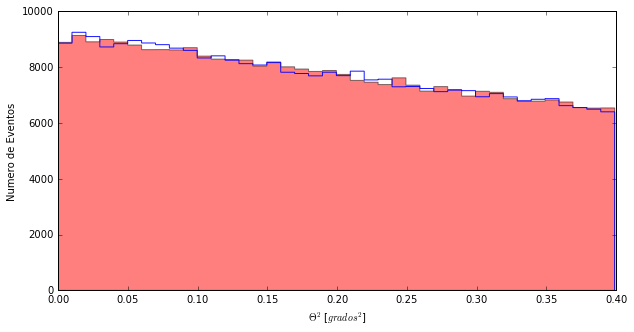

In [5]:
pl.figure(1, figsize=(10, 5), facecolor='w', edgecolor='k')
Noff, ThetasOff, _ = pl.hist(perseus_OFF_cut.theta2, bins=40, histtype='stepfilled', color='red', alpha=0.5, normed=False)
Non, ThetasOn, _ = pl.hist(perseus_ON_cut.theta2, bins=40, histtype='step', color = 'blue',alpha=0.9, normed=False)
pl.xlabel('$\Theta^2$ [$grados^2$]')
pl.ylabel('Numero de Eventos')
pl.show()

Se parece al de Alba y Daniel, ¿no? Pero en realidad no es igual. ¿Has visto la diferencia? El mío está partido en más trocitos. Yo tengo 40 y ellos sólo tienen 30. Lo he hecho con el "bin=40" en la instrucción: 

> pl.hist(CutHadOff.compressed(), bins=40, histtype='stepfilled', color='red', alpha=0.5, normed=False)

También puedo cambiar otras cosas: el color (color = 'yellow') o como se pintan las barras del gráfico (histtype='bar')

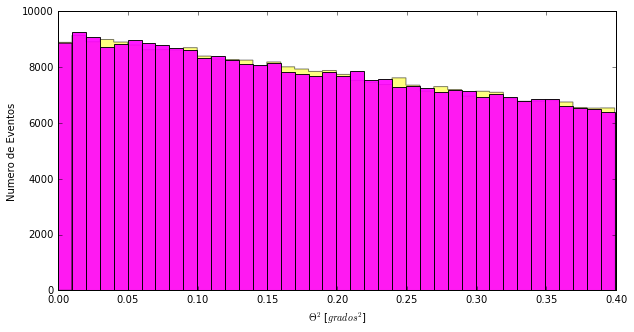

In [6]:
pl.figure(1, figsize=(10, 5), facecolor='w', edgecolor='k')
Noff, ThetasOff, _ = pl.hist(perseus_OFF_cut.theta2, bins=40, histtype='stepfilled', color='yellow', alpha=0.5, normed=False)
Non, ThetasOn, _ = pl.hist(perseus_ON_cut.theta2, bins=40, histtype='bar', color = 'magenta',alpha=0.9, normed=False)
pl.xlabel('$\Theta^2$ [$grados^2$]')
pl.ylabel('Numero de Eventos')
pl.show()

¿Cuál os gusta más?

---------

Ahora sólo nos falta ver cómo de significativo es los que vemos. A simple vista ya parece que no lo es, pero calculemos la ** siginificancia **.

Alba se queja de Daniel, pero ella también hace alguna trampilla ... para calcular la **significancia** usa una función sin explicar qué instrucciones contiene. ¡Vamos a resolverlo!

De hecho el cálculo de la significancia es muy simple:

> S = (N_on - No_off)/sqrt(N_on+N_off)

donde sqrt(...) indica la raiz cuadrada de lo que hay dentro del paréntesis y que en Python se puede poner como:
> (N_on+N_off)**(0.5)

Para tener N_on y N_off simplemente sumo los sucesos que tengo en las dos primeras divisiones del gráfico anterior y que me he guardado en las variables ** Non ** y **Noff** para depués hacer la operación aritmética.


In [7]:
EventosON=np.sum(Non[0:2])
EventosOFF=np.sum(Noff[0:2])
Significancia=(EventosON-EventosOFF)/(EventosON+EventosOFF)**(0.5)
print ("Eventos ON =", EventosON)
print ("Eventos OFF =", EventosOFF)
print ("Significancia =", Significancia)

('Eventos ON =', 18111.0)
('Eventos OFF =', 18025.0)
('Significancia =', 0.45240605872906037)


Lo que decía ** 0.45 sigmas ** o lo que es lo mismo, no vemos rayos gamma que nos lleguen de la materia oscura que hay en Perseus. Pero, ¿quiere decir esto que no hay? Lo veremos pronto y por esos también me he apuntado el número de Eventos ON y OFF.